In [1]:
import glob
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from num2words import num2words
lemmatizer=WordNetLemmatizer()
import pickle
stop_words = set(stopwords.words('english'))
import math   


accList=[]

In [2]:
def calculateIdf(df):
    dictIdf={}
    for keys in df:
        dictIdf[keys]=math.log(5/(1+df[keys]))
    return dictIdf

def calculateIdfdoc(dfdoc):
    dictIdfdoc={}
    for keys in dfdoc:
        dictIdfdoc[keys]=math.log(len(train)/(1+dfdoc[keys]))
    return dictIdfdoc


def calculate_tfIdf(dictIdf):
    dict_tfIdf={}
    for clas in dict_train:
        dict_tfIdf[clas]={}
        for terms in set(dict_train[clas]):
            dict_tfIdf[clas][terms]=dictIdf[terms]*(1+math.log(1+dict_train[clas].count(terms)))
        
        print(clas)
    return dict_tfIdf


    
def calculate_cond_prob():
    for keys in dict_features:
        temp=set(dict_features[keys])
        prob_dict[keys]={}
        class_len=len(dict_features[keys])
        for terms in temp:
            tf=dict_features[keys].count(terms)
            prob_dict[keys][terms]=(tf+1)/(class_len+vocab_len)

def calculate_cond_prob_all():
    for keys in dict_train:
        temp=set(dict_train[keys])
        prob_dict[keys]={}
        class_len=len(dict_train[keys])
        for terms in temp:
            tf=dict_train[keys].count(terms)
            prob_dict[keys][terms]=(tf+1)/(class_len+vocab_len)
        


In [20]:
import random
docList=[]
for i in range(1,5001):
    docList.append(i)
random.shuffle(docList)
#print(len(docList))
train_data_percent=int(input("Enter percentage of data you want as training data"))
length=int(train_data_percent*5000/100)
train=[]
test=[]
for i in range(0,length):
    train.append(docList[i])
for i in range(length,5000):
    test.append(docList[i])
print(len(train),len(test))
#print(max(docList))

Enter percentage of data you want as training data50
2500 2500


In [21]:
j=1
k=0

dict_mi_train={}
dict_train={}
dict_test={}
invertedIndex={}
globalDocNames={}
df={}
dfDoc={}
dict_doc_train={}
doclist=[]
train_vocab=[]
direct = [f for f in sorted(glob.glob("E:/E/IIIT Delhi/IR/Assign4/20_newsfolder/*", recursive=True))]
for d in direct:
    files = [f for f in glob.glob(d+"/*", recursive=True)]
    filesRead={}
    i=0
    print(d[41:])
    dict_train[d[41:]]=[]
    dict_mi_train[d[41:]]={}
    
    tokenizer = RegexpTokenizer(r'\w+')
    for f in files:
        list1=[]
        list2=[]
        list3=[]
        i+=1
        k+=1
        
        fileRead = open(f, "r")
        input_str=fileRead.read().translate(str.maketrans("","",string.punctuation))
        input_str=tokenizer.tokenize(input_str.lower())
        pattern='[0-9][a-z]|[0-9]'
        

        stop_words = set(stopwords.words('english'))
        
        result = [i for i in input_str if not i in stop_words]
       
        list1=result
        
        for word in list1:
            if word.isdecimal():
                word1=lemmatizer.lemmatize(word)
                if k in train:
                    list2.append(num2words(word1))
                    train_vocab.append(num2words(word1))
                else:
                    list3.append(num2words(word1))
            else:
                if k in train:
                    list2.append(lemmatizer.lemmatize(word))
                    train_vocab.append(lemmatizer.lemmatize(word))
                else:
                    list3.append(lemmatizer.lemmatize(word))
        
        if k in train:
            dict_doc_train[k]={}
            for terms in set(list2):
                dict_doc_train[k][terms]=list2.count(terms)
                
                if terms not in dfDoc:
                    dfDoc[terms]=1
                else:
                    dfDoc[terms]+=1
                
            
        
        if k in test:
            dict_test[k]=list3
        else:
            for terms in set(list2):
                if terms in dict_mi_train[d[41:]]:
                    dict_mi_train[d[41:]][terms]+=1
                else:
                    dict_mi_train[d[41:]][terms]=1
        
        
    
            for words in list2:
                dict_train[d[41:]].append(words)
        
    print(k)    
    tempListTokens=[]
    for tokens in set(dict_train[d[41:]]):
        tempListTokens.append(tokens)
#     for tokens in set(list3):
#         tempListTokens.append(tokens)
    for tokens in tempListTokens:
        if tokens not in df:
            df[tokens]=1
        else:
            df[tokens]=df[tokens]+1

    
    print(j)
    j=j+1
    
    
dictIdf=calculateIdf(df)
dictIdfdoc=calculateIdfdoc(dfDoc)

print(len(dict_train))
print(len(dict_test))
print(len(dictIdf))
print(len(dictIdfdoc))
print(len(set(train_vocab)))
print(len(dict_mi_train))

comp.graphics
1000
1
rec.sport.hockey
2000
2
sci.med
3000
3
sci.space
4000
4
talk.politics.misc
5000
5
5
2500
56037
56037
56037
5


In [22]:
dict_tfIdf={}
dict_tfIdf=calculate_tfIdf(dictIdf)
print(len(dict_tfIdf))

comp.graphics
rec.sport.hockey
sci.med
sci.space
talk.politics.misc
5


In [23]:
def calculate_prior_prob():
    c1=0
    c2=0
    c3=0
    c4=0
    c5=0
    for docs in train:
        if docs<1001:
            c1+=1
        elif docs>1000 and docs<2001:
            c2+=1
        elif docs>2000 and docs<3001:
            c3+=1
        elif docs>3000 and docs<4001:
            c4+=1
        elif docs>4000 and docs<5001:
            c5+=1
       # print(docs)
    print(c1,c2,c3,c4,c5) 
    i=0
    for clas in dict_train:
        if i==0:
            prior_prob[clas]=c1
        if i==1:
            prior_prob[clas]=c2
        if i==2:
            prior_prob[clas]=c3
        if i==3:
            prior_prob[clas]=c4
        if i==4:
            prior_prob[clas]=c5
        i=i+1
    
prior_prob={}
calculate_prior_prob()
print(len(prior_prob))


class_list=[]
for clas in dict_train:
    class_list.append(clas)


491 496 518 502 493
5


In [7]:
dict_features={}
vocab=[]

def calculate_MI():
    for clas in dict_mi_train:
        dict_mi_score[clas]={}
        non_clas=0
        for clas2 in dict_mi_train:
            if clas2!=clas:
                non_clas+=prior_prob[clas2]
        #print(non_clas)
        for terms in dict_mi_train[clas]:
            n=len(train)
            n11=dict_mi_train[clas][terms]
            n01=(prior_prob[clas]*len(train))-n11
            n10=0
            for clas2 in dict_mi_train:
                if terms in dict_mi_train[clas2]:
                    n10+=dict_mi_train[clas2][terms]
            
            n10=n10-n11
            #print(n10)
            n00=0
            
            n00=non_clas-n10
            n1_=(n10+n11)
            n0_=(n00+n01)
            n_1=(n01+n11)
            n_0=(n00+n10)
            
#             term2=(n*n01)/(n0_*n_1)
#             term3=(n*n10)/(n1_*n_0)
#             term4=(n*n00)/(n0_*n_0)
#             print(n11,n10,n01,n00)
#             print(term2,term3,term4,"\n")
            
            mi=n11/n*math.log((n*n11)/(n1_*n_1),2)
            if n01!=0 and n0_!=0 and n_1!=0:
                mi=mi+n01/n*math.log((n*n01)/(n0_*n_1),2)
            
            if n10!=0 and n1_!=0 and n_0!=0:
                mi=mi+n10/n*math.log((n*n10)/(n1_*n_0),2)
            
            if n00!=0 and n0_!=0 and n_0!=0:
                mi=mi+n00/n*math.log((n*n00)/(n0_*n_0),2)

            dict_mi_score[clas][terms]=mi    
                
dict_mi_score={}
calculate_MI()
print(len(dict_mi_score))

def select_MI_features():
    import operator
    for clas in dict_mi_score:
        dict_features[clas]=[]
        tempDict=dict( sorted(dict_mi_score[clas].items(), key=operator.itemgetter(1),reverse=True))
        i=0
        for terms in tempDict:
            dict_features[clas].append(terms)
            vocab.append(terms)
            i+=1
            if i>(len(tempDict)*0.7):
                break
    return vocab






# prob_dict={}
# print(len(vocab))
# vocab_len=len(set(vocab))
# print(vocab_len)
# calculate_cond_prob()
# print(len(prob_dict))

5


In [29]:
dict_features={}
vocab=[]
def feature_selection_tfidf():
    vocab=[]
    for clas in dict_train:
        temp=[]
        dict_features[clas]=[]
        for term in dict_train[clas]:
            temp1=[]
            temp1.append(dict_tfIdf[clas][term])
            temp1.append(term)
            temp.append(temp1)
        
        temp.sort(reverse=True)
        i=0
        for lists in temp:
            dict_features[clas].append(lists[1])
            i+=1
            vocab.append(lists[1])
            if i>(int(len(temp)*0.3)):
                break
    return vocab





choice=int(input("1:TF-IDF  2:MI"))
if choice == 1:
    print("TFIDF is selected")
    vocab=feature_selection_tfidf()
    print(len(dict_features))
else:
    print("MI is Selected")
    vocab=select_MI_features()
    print(len(dict_features))





prob_dict={}
print(len(vocab))
vocab_len=len(set(vocab))
print(vocab_len)
calculate_cond_prob()
print(len(prob_dict))

1:TF-IDF  2:MI2
MI is Selected
5
67984
38919
5


In [30]:
def classify_naive(test_doc):
    for clas in dict_features:
        ans=0
        ans+=math.log(prior_prob[clas]/len(train))
        for term in test_doc:
            if term in prob_dict[clas].keys():
                ans+=math.log(prob_dict[clas][term])
            else:
                ans+=math.log(1/(len(dict_features[clas])+vocab_len))
        ans_dict[clas]=ans


y_test=[]
y_pred=[]
i=0
for docs in dict_test:
    if docs<1001:
        y_test.append(class_list[0])
    elif docs>1000 and docs<2001:
        y_test.append(class_list[1])
        
    elif docs>2000 and docs<3001:
        y_test.append(class_list[2])
                      
    elif docs>3000 and docs<4001:
        y_test.append(class_list[3])
                      
    else:
        y_test.append(class_list[4])
        
     
    test_doc=[]
    test_doc=dict_test[docs]
    #print(len(test_doc))

    ans_dict={}
    classify_naive(test_doc)
    y_pred.append(max(ans_dict,key=ans_dict.get))
    i+=1
    if i%50==0:
        print(i)
        
print(len(y_test),len(y_pred))

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2500 2500


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred,labels=class_list))
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("accuracy=",accuracy_score(y_test,y_pred))


[[502   4   0   3   0]
 [  0 503   0   0   1]
 [ 11   2 469   0   0]
 [  5   5   1 485   2]
 [  0   0   1   1 505]]
accuracy= 0.9856


In [32]:
import operator
acc_result_knn=[]
def calculateCosineScore(queryVectorTemp,docVectorTemp):
    cosineScore=0
    deno1=0
    deno2=0
    for i in range(len(queryVectorTemp)):
        cosineScore=cosineScore+queryVectorTemp[i]*docVectorTemp[i]
    for nums in queryVectorTemp:
        deno1=deno1+nums*nums
    deno1=math.sqrt(deno1)
    for nums in docVectorTemp:
        deno2=deno2+nums*nums
    deno2=math.sqrt(deno2)
    deno1=deno1*deno2
    
    cosineScore=cosineScore/(deno1+1)
    return cosineScore



def knn(test_doc,k):
    queryVec=[]
    for terms in set(test_doc):
        if terms in dictIdfdoc:
            tfidf=math.log(1+test_doc.count(terms))*dictIdfdoc[terms]
        else:
            tfidf=0
        queryVec.append(tfidf)
    dictScoreCosine={}    
    for docs in train:
        docVec=[]
        if docs<1001:
            clas=(class_list[0])
        elif docs>1000 and docs<2001:
            clas=(class_list[1])

        elif docs>2000 and docs<3001:
            clas=(class_list[2])

        elif docs>3000 and docs<4001:
            clas=(class_list[3])

        else:
            clas=(class_list[4])
        
        
        #term_list=list(set(dict_features[clas]) & set(dict_doc_train[docs].keys()))
        for terms in set(test_doc):
            if terms in dict_doc_train[docs] and dict_features[clas]:
                tfidf=math.log(1+dict_doc_train[docs][terms])*dictIdfdoc[terms]
            else:
                tfidf=0
            docVec.append(tfidf)
            
        cosineScore=calculateCosineScore(queryVec,docVec)
        dictScoreCosine[docs]=cosineScore
        
    dictScoreCosine=dict( sorted(dictScoreCosine.items(), key=operator.itemgetter(1),reverse=True))
    #print(dictScoreCosine)
    ans_dict={}
    for clas2 in dict_features:
        ans_dict[clas2]=0
    
    #print(class_list[0])
    for keys in dictScoreCosine:
        #print(keys,dictScoreCosine[keys])
        if k<=0:
            break
        k-=1
        if keys<1001:
          #  print(class_list[0])
            ans_dict[class_list[0]]+=dictScoreCosine[keys]
            
        elif keys>1000 and keys<2001:
         #   print(class_list[1])
            ans_dict[class_list[1]]+=dictScoreCosine[keys]

        elif keys>2000 and keys<3001:
        #    print(class_list[2])
            ans_dict[class_list[2]]+=dictScoreCosine[keys]

        elif keys>3000 and keys<4001:
        #    print(class_list[3])
            ans_dict[class_list[3]]+=dictScoreCosine[keys]

        else:
         #   print(class_list[4])
            ans_dict[class_list[4]]+=dictScoreCosine[keys]

        
    return ans_dict



k=1
from sklearn.metrics import confusion_matrix, accuracy_score
while k<=5:
    y_test_knn=[]
    y_pred_knn=[]
    i=0
    for documents in test:
        if documents<1001:
            y_test_knn.append(class_list[0])
        elif documents>1000 and documents<2001:
            y_test_knn.append(class_list[1])

        elif documents>2000 and documents<3001:
            y_test_knn.append(class_list[2])

        elif documents>3000 and documents<4001:
            y_test_knn.append(class_list[3])

        else:
            y_test_knn.append(class_list[4])


        ans=knn(dict_test[documents],k)
        y_pred_knn.append(max(ans,key=ans.get))
        #print(max(ans,key=ans.get),y_test_knn[i])
        #print(i)
        i+=1
    #     if i>=1:
    #         break
#         if i%500 == 0:
#             print(i)

    acc_result_knn.append(accuracy_score(y_test_knn,y_pred_knn))
    print(confusion_matrix(y_test_knn, y_pred_knn,labels=class_list))
    print("k= ",k," accuracy=",accuracy_score(y_test_knn,y_pred_knn))
    k=k+2

[[484   8   7   9   1]
 [  5 496   0   0   3]
 [ 28   7 434   8   5]
 [ 34   6   7 444   7]
 [  7  14  11   5 470]]
k=  1  accuracy= 0.9312
[[490   7   6   5   1]
 [ 11 488   2   0   3]
 [ 39   6 421   7   9]
 [ 63   4   5 417   9]
 [ 20  10  10   5 462]]
k=  3  accuracy= 0.9112
[[497   3   6   2   1]
 [ 12 486   2   0   4]
 [ 44   3 420   5  10]
 [ 61   1   3 426   7]
 [ 18   4  11   6 468]]
k=  5  accuracy= 0.9188


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


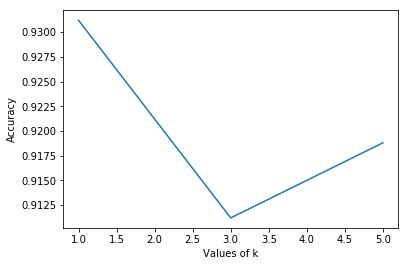

In [33]:
import matplotlib.pyplot as plt 
x_axis=[1,3,5]
plt.plot(x_axis,acc_result_knn)
plt.xlabel("Values of k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

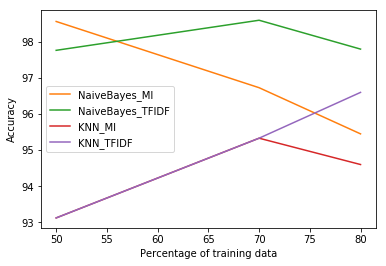

In [35]:
import matplotlib.pyplot as plt1
result_NB_MI=[95.45,96.73,98.566]             #These all values are taken on the basis of Screen shot attached in Analysis File.
result_NB_TFIDF=[97.8,98.6,97.766]  

result_KNN_MI=[94.6,95.33,93.12]             #These all values are taken on the basis of Screen shot attached in Analysis File.
result_KNN_TFIDF=[96.6,95.33,93.12]  

data_split=[80,70,50]
plt1.plot(data_split,result_NB_MI,label="NaiveBayes_MI")
plt1.plot(data_split,result_NB_TFIDF,label="NaiveBayes_TFIDF")

plt1.plot(data_split,result_KNN_MI,label="KNN_MI")
plt1.plot(data_split,result_KNN_TFIDF,label="KNN_TFIDF")

plt1.xlabel("Percentage of training data")
plt1.ylabel("Accuracy")
plt1.legend()
plt1.show()



In [ ]:
# c1=0
# c2=0
# c3=0
# c4=0
# c5=0
# for docs in test:
#     if docs<1001:
#         c1+=1
#     elif docs>1000 and docs<2001:
#         c2+=1
#     elif docs>2000 and docs<3001:
#         c3+=1
#     elif docs>3000 and docs<4001:
#         c4+=1
#     elif docs>4000 and docs<5001:
#         c5+=1
#     #print(docs)
# print(c1,c2,c3,c4,c5)

In [ ]:
# print(test)

In [ ]:
# import operator
# tempd={}
# tempd[1]={}
# tempd[1][1]=[1]
# tempd[1][2]=[2]
# tempd[1][3]=[3]
# tempd[1][4]=[4]
# tempDi=dict( sorted(tempd[1].items(), key=operator.itemgetter(1),reverse=True))
# print(tempDi)

In [ ]:
# templist=[[1,'s'],[0,'z'],[2,'a']]
# templist.sort(reverse=True)
# for lists in templist:
#     print(lists[1])

In [ ]:
# tempvoc=[]
# for docs in dict_train:
#     for terms in dict_train[docs]:
#         tempvoc.append(terms)
# print(len(set(tempvoc)))

In [ ]:
# accList.append(accuracy_score(y_test,y_pred))
# print(accList)


# pickle_out = open("E:/E/IIIT Delhi/IR/Assign5/probdict50.pickle","wb")
# pickle.dump(prob_dict, pickle_out)
# pickle_out = open("E:/E/IIIT Delhi/IR/Assign5/dict_features50.pickle","wb")
# pickle.dump(dict_features, pickle_out)
# pickle_out = open("E:/E/IIIT Delhi/IR/Assign5/train50.pickle","wb")
# pickle.dump(train, pickle_out)
# pickle_out = open("E:/E/IIIT Delhi/IR/Assign5/test50.pickle","wb")
# pickle.dump(test, pickle_out)
# pickle_out = open("E:/E/IIIT Delhi/IR/Assign5/tfidf50.pickle","wb")
# pickle.dump(dict_tfIdf, pickle_out)
# pickle_out.close()